In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Read the dataset from CSV file
bus_data = pd.read_csv("/Users/vaishnavishankardevadig/Downloads/CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals-2.csv")

# Select the relevant columns for clustering
bus_cluster_data = bus_data.loc[:, ["Avg_Weekday_Rides", "Avg_Saturday_Rides", "Avg_Sunday_Holiday_Rides"]]

# Scale the data
scaler = StandardScaler()
bus_cluster_data_scaled = scaler.fit_transform(bus_cluster_data)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(bus_cluster_data_scaled)
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# Apply k-means clustering with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_model.fit(bus_cluster_data_scaled)
bus_data["Cluster"] = kmeans_model.labels_

# Visualize the clusters
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bus_cluster_data_scaled[:, 0], bus_cluster_data_scaled[:, 1], c=kmeans_model.labels_, cmap="rainbow")
ax.set_xlabel("Avg_Weekday_Rides")
ax.set_ylabel("Avg_Saturday_Rides")
plt.show()

# Print the results
print(bus_data)


In [ ]:
pip install kneed

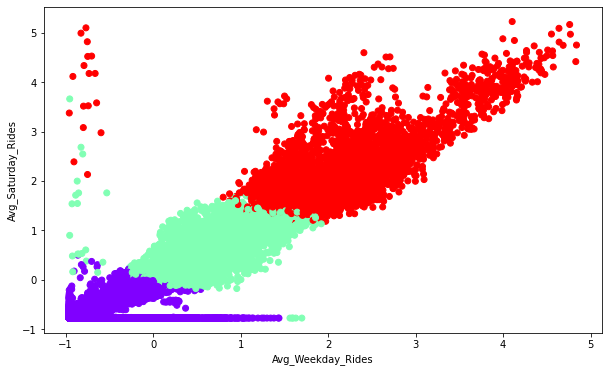

      route                        routename month_beginning  \
0         1                Indiana/Hyde Park          1/1/01   
1         2                Hyde Park Express          1/1/01   
2         3                       King Drive          1/1/01   
3         4                    Cottage Grove          1/1/01   
4         6             Jackson Park Express          1/1/01   
...     ...                              ...             ...   
35961   172            U. of Chicago/Kenwood         12/1/22   
35962   192  U. of Chicago Hospitals Express         12/1/22   
35963   201                    Central/Ridge         12/1/22   
35964   206              Evanston Circulator         12/1/22   
35965  1001      Shuttle/Special Event Route         12/1/22   

       Avg_Weekday_Rides  Avg_Saturday_Rides  Avg_Sunday_Holiday_Rides  \
0                 6982.6                 0.0                       0.0   
1                 1000.0                 0.0                       0.0   
2        

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Read the dataset from CSV file
bus_data = pd.read_csv("/Users/vaishnavishankardevadig/Downloads/CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals-2.csv")

# Select the relevant columns for clustering
bus_cluster_data = bus_data.loc[:, ["Avg_Weekday_Rides", "Avg_Saturday_Rides", "Avg_Sunday_Holiday_Rides"]]

# Scale the data
scaler = StandardScaler()
bus_cluster_data_scaled = scaler.fit_transform(bus_cluster_data)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(bus_cluster_data_scaled)
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# Apply k-means clustering with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_model.fit(bus_cluster_data_scaled)
bus_data["Cluster"] = kmeans_model.labels_

# Visualize the clusters
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bus_cluster_data_scaled[:, 0], bus_cluster_data_scaled[:, 1], c=kmeans_model.labels_, cmap="rainbow")
ax.set_xlabel("Avg_Weekday_Rides")
ax.set_ylabel("Avg_Saturday_Rides")
plt.show()

# Print the results
print(bus_data)


In [2]:
# Group the data by cluster labels and display a sample of the data points in each cluster
for cluster_label, group in bus_data.groupby("Cluster"):
    print(f"Cluster {cluster_label}:")
    print(group.head())


Cluster 0:
  route          routename month_beginning  Avg_Weekday_Rides  \
0     1  Indiana/Hyde Park          1/1/01             6982.6   
1     2  Hyde Park Express          1/1/01             1000.0   
5     7           Harrison          1/1/01             5504.4   
7    8A      South Halsted          1/1/01             3196.5   
9    10    Museum of S & I          1/1/01                0.0   

   Avg_Saturday_Rides  Avg_Sunday_Holiday_Rides  MonthTotal  Cluster  
0                 0.0                       0.0      153617        0  
1                 0.0                       0.0       22001        0  
5                 0.0                       0.0      121097        0  
7              3006.6                    1336.2       89030        0  
9               562.6                     372.9        4115        0  
Cluster 1:
   route       routename month_beginning  Avg_Weekday_Rides  \
11    12       Roosevelt          1/1/01            10763.5   
17    21          Cermak          1

In [3]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette score
silhouette_avg = silhouette_score(bus_cluster_data_scaled, kmeans_model.labels_)
print("Silhouette score:", silhouette_avg)

# Calinski-Harabasz score
ch_score = calinski_harabasz_score(bus_cluster_data_scaled, kmeans_model.labels_)
print("Calinski-Harabasz score:", ch_score)

# Davies-Bouldin score
db_score = davies_bouldin_score(bus_cluster_data_scaled, kmeans_model.labels_)
print("Davies-Bouldin score:", db_score)

Silhouette score: 0.6333605652308159
Calinski-Harabasz score: 104757.73820429464
Davies-Bouldin score: 0.5665584420999883


In [ ]:
#This is just a test Example

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Read the dataset from CSV file
bus_data = pd.read_csv("/Users/vaishnavishankardevadig/Downloads/CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals-2.csv")

# Select the relevant columns for clustering
bus_cluster_data = bus_data.loc[:, ["Avg_Weekday_Rides", "Avg_Saturday_Rides", "Avg_Sunday_Holiday_Rides"]]

# Scale the data
scaler = StandardScaler()
bus_cluster_data_scaled = scaler.fit_transform(bus_cluster_data)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(bus_cluster_data_scaled)
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# Apply k-means clustering with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_model.fit(bus_cluster_data_scaled)
bus_data["Cluster"] = kmeans_model.labels_

# Calculate performance metrics
silhouette = silhouette_score(bus_cluster_data_scaled, kmeans_model.labels_)
davies_bouldin = davies_bouldin_score(bus_cluster_data_scaled, kmeans_model.labels_)
calinski_harabasz = calinski_harabasz_score(bus_cluster_data_scaled, kmeans_model.labels_)

# Print the results
print("Number of clusters:", optimal_k)
print("Silhouette score:", silhouette)
print("Davies-Bouldin score:", davies_bouldin)
print("Calinski-Harabasz score:", calinski_harabasz)
print("\nCluster assignment for each bus route:")
print(bus_data[["route", "Cluster"]])


Number of clusters: 3
Silhouette score: 0.6333605652308159
Davies-Bouldin score: 0.5665584420999883
Calinski-Harabasz score: 104757.73820429464

Cluster assignment for each bus route:
      route  Cluster
0         1        0
1         2        0
2         3        2
3         4        2
4         6        2
...     ...      ...
35961   172        0
35962   192        0
35963   201        0
35964   206        0
35965  1001        0

[35966 rows x 2 columns]
